# All figures of the paperdraft

In [1]:
import json
from pathlib import Path
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib.gridspec import GridSpec
import os
  
def get_experiment_base_path():
    notebook_dir = Path(os.path.dirname(os.path.abspath("__file__")))
    experiment_base_path = notebook_dir / "../experiments/"
    return experiment_base_path

def get_output_fig_path():
    notebook_dir = Path(os.path.dirname(os.path.abspath("__file__")))
    output_fig_path = notebook_dir / "../figures/"
    return output_fig_path



with open(get_experiment_base_path() / 'paperdraft.json', 'r') as f:
    experiment_dict = json.load(f)

def get_experiment_path(experiment):
    return get_experiment_base_path() / experiment_dict[experiment]['experiment_path']

def get_metrics_dict(experiment):
    with open(get_experiment_path(experiment) / 'ensemble_metrics.json', 'r') as f:
        return json.load(f)

## Figure Performance

In [2]:

results_10d = get_metrics_dict('001')
results_30d = get_metrics_dict('002')
results_90d = get_metrics_dict('003')
results_365d = get_metrics_dict('004')

from pathlib import Path
experiment_path = Path('../rapid-geostrophic-reconstruction/figs/')
metric_6cycle_90d = get_metrics_dict('028') #load_metrics_dict(experiment_path / 'experiment_20250227_215148' )
metric_6cycle_365d = get_metrics_dict('029') #load_metrics_dict(experiment_path / 'experiment_20250227_180137' )
metric_6cycle_1825d = get_metrics_dict('032') #load_metrics_dict(experiment_path / 'experiment_20250227_215242' )

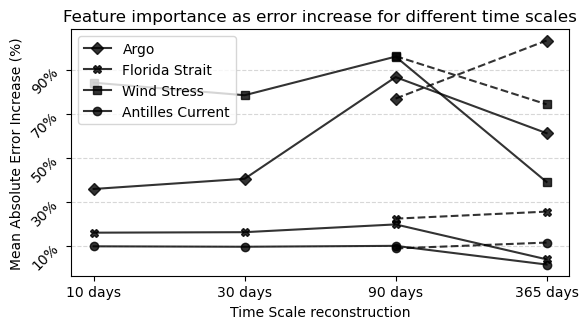

In [3]:
markers = {
    'Ac': 'o', 
    'Ws': 's', 
    'Ar': 'D', 
    'Fc': 'X'
}

names = {
    'Ac': 'Antilles Current', 
    'Ws': 'Wind Stress', 
    'Ar': 'Argo', 
    'Fc': 'Florida Strait'
}


fig = plt.figure(figsize=(6,3.4))
ax = fig.add_subplot(1,1,1)


for variable in ['Ar', 'Fc', 'Ws', 'Ac']:

    improvement_10d_var = results_10d['permutation'][variable]['mean']['MAE'] / results_10d['original']['mean']['MAE'] - 1
    improvement_30d_var = results_30d['permutation'][variable]['mean']['MAE'] / results_30d['original']['mean']['MAE'] - 1
    improvement_90d_var = results_90d['permutation'][variable]['mean']['MAE'] / results_90d['original']['mean']['MAE'] - 1
    improvement_365d_var = results_365d['permutation'][variable]['mean']['MAE'] / results_365d['original']['mean']['MAE'] - 1

    improvement_6cycles_90d_var = metric_6cycle_90d['permutation'][variable]['mean']['MAE'] / metric_6cycle_90d['original']['mean']['MAE'] - 1
    improvement_6cycles_365d_var = metric_6cycle_365d['permutation'][variable]['mean']['MAE'] / metric_6cycle_365d['original']['mean']['MAE'] - 1
    improvement_6cycles_1825d_var = metric_6cycle_1825d['permutation'][variable]['mean']['MAE'] / metric_6cycle_1825d['original']['mean']['MAE'] - 1


    ax.plot([0,1,2,3], [improvement_10d_var, improvement_30d_var, improvement_90d_var, improvement_365d_var], label=names[variable], marker=markers[variable], c = 'black', alpha=0.8)
    ax.plot([2,3], [improvement_6cycles_90d_var, improvement_6cycles_365d_var], marker=markers[variable], c = 'black', alpha=0.8, linestyle = '--')


ax.set_ylabel('Mean Absolute Error Increase (%)')
ax.set_xlabel('Time Scale reconstruction')

ax.set_yticks([.1,.3,.5,.7,.9])
ax.set_yticklabels(['10%', '30%', '50%', '70%', '90%'], rotation=45)

ax.grid(which='major', axis = 'y', linestyle='--', alpha=0.5)

# ax.set_xscale('log')
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['10 days', '30 days', '90 days', '365 days'])
# ax.legend(loc=(.65,.2))

ax.set_title('Feature importance as error increase for different time scales')

fig.tight_layout()

plt.legend()

plt.savefig(get_output_fig_path() / '03_feature_importance_time_scale.png', dpi=300)